# Telecom Churn Analytics

### Data Extraction

In [2]:
import pandas as pd
import numpy as np
import random as nd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, RFECV, SelectPercentile, f_classif, SelectKBest 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, binarize

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score,roc_curve, recall_score, classification_report
from sklearn.decomposition import PCA
%matplotlib inline


In [3]:
dsTrain = pd.read_csv('churnTrain.csv')
dsTest = pd.read_csv('churnTest.csv')
dsTrain.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2. Exploratory Data Analysis

In [4]:
print(dsTrain.info())
print(dsTrain.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                  3333 non-null object
Account_Length         3333 non-null int64
Area_Code              3333 non-null int64
Phone_No               3333 non-null int64
International_Plan     3333 non-null object
Voice_Mail_Plan        3333 non-null object
No_Vmail_Messages      3333 non-null int64
Total_Day_minutes      3333 non-null float64
Total_Day_Calls        3333 non-null int64
Total_Day_charge       3333 non-null float64
Total_Eve_Minutes      3333 non-null float64
Total_Eve_Calls        3333 non-null int64
Total_Eve_Charge       3333 non-null float64
Total_Night_Minutes    3333 non-null float64
Total_Night_Calls      3333 non-null int64
Total_Night_Charge     3333 non-null float64
Total_Intl_Minutes     3333 non-null float64
Total_Intl_Calls       3333 non-null int64
Total_Intl_Charge      3333 non-null float64
No_CS_Calls            3333 non-null int64
Churn         

In [5]:
print(dsTrain.isnull().sum())

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64


Text(0.5,0,'Churn')

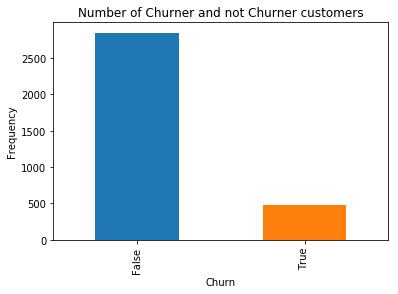

In [6]:
pd.value_counts(dsTrain['Churn']).plot.bar()
plt.title('Number of Churner and not Churner customers')
plt.ylabel('Frequency')
plt.xlabel('Churn')

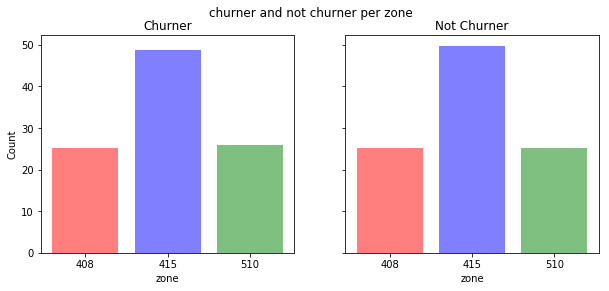

In [7]:
#churner and not churner custemers per zone
fig, (axe1, axe2)= plt.subplots(1, 2, sharex=True, sharey= True)
fig.suptitle('churner and not churner per zone')
fig.set_figwidth(10)
churner = dsTrain[dsTrain['Churn']== True].groupby('Area_Code')['Churn'].count()
y_pos1 = churner.index.values.astype('str')
values1 = (churner.values/(dsTrain[dsTrain['Churn']== True]['Churn'].count()))*100
axe1.title.set_text('Churner')
axe1.bar(y_pos1, values1 ,align='center', alpha=0.5, color='rbg', )
axe1.set_xlabel('zone')
axe1.set_ylabel('Count')

notChurner = dsTrain[dsTrain['Churn']== False].groupby('Area_Code')['Churn'].count()
y_pos2 = notChurner.index.values.astype('str')
values2 = (notChurner.values/(dsTrain[dsTrain['Churn']== False]['Churn'].count()))*100
axe2.title.set_text('Not Churner')
axe2.bar(y_pos1, values2 ,align='center', alpha=0.5, color='rbg')
axe2.set_xlabel('zone')

plt.show()

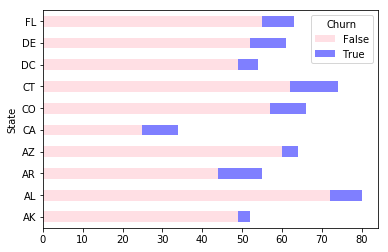

In [8]:
var1 = dsTrain.groupby(['State','Churn']).Churn.count()
var1.unstack()[:10].plot(kind='barh',stacked=True, color=['pink', 'blue'], alpha=0.5)

Text(0.5,1,'churner rate per average of Account_Length')

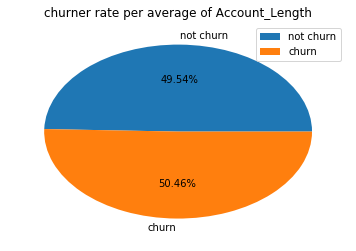

In [9]:
var2 = dsTrain.groupby('Churn').Account_Length.mean()
plt.pie(var2, labels=["not churn", "churn"], autopct="%1.2f%%")
plt.legend()
plt.title("churner rate per average of Account_Length")


Text(0.5,1,'International_Plan')

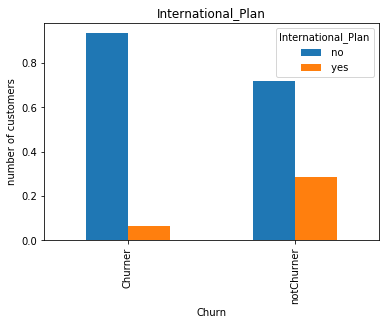

In [10]:
var3 = dsTrain.groupby(['Churn', 'International_Plan']).Churn.count().unstack()
var3.rename(index={0: "Churner", 1: "notChurner"}, columns={0:'with_Int_Plan', 1:'without_Int_Plan'}, inplace=True)
v = var3.div(var3.sum(1), axis=0)
v.plot.bar()
plt.ylabel ("number of customers")
plt.title('International_Plan')


Text(0.5,1,'Voice_Mail_Plan')

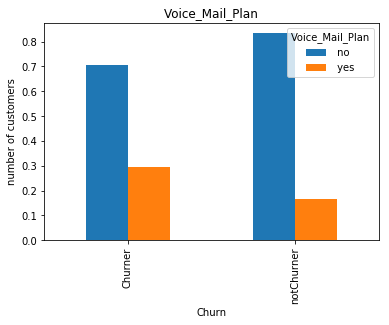

In [11]:
var4 = dsTrain.groupby(['Churn', 'Voice_Mail_Plan']).Churn.count().unstack()
var4.rename(index={0: "Churner", 1: "notChurner"}, columns={0:'with_Voice_Mail_Plan', 1:'without_Voice_Mail_Plan'}, inplace=True)
v = var4.div(var4.sum(1), axis=0)
v.plot.bar()
plt.ylabel ("number of customers")
plt.title('Voice_Mail_Plan')

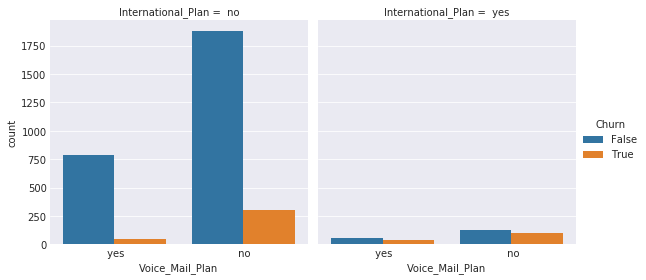

In [12]:
sns.set_style('darkgrid')
sns.factorplot(x='Voice_Mail_Plan', hue ='Churn', col='International_Plan', kind='count', data=dsTrain)

Text(0.5,1,'averages of many parameters')

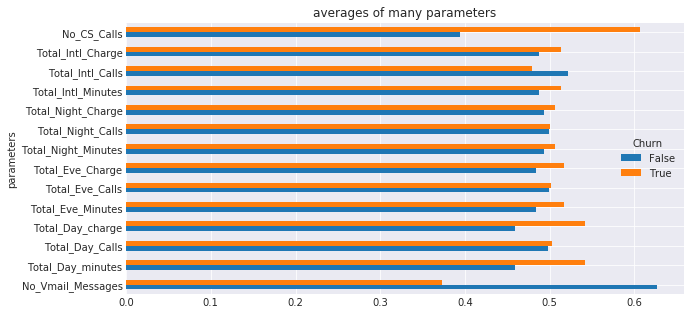

In [13]:
cols= dsTrain.columns.values[6:20]
var5 = dsTrain.groupby('Churn')[cols].mean().T
var5.div(var5.sum(1), axis=0).plot(kind='barh', figsize=(10,5))
var5.columns=["Churner", "notChurner"]
plt.ylabel ("parameters")
plt.title("averages of many parameters")


### 3. Data Cleaning and Mining

In [14]:
churn={True:0, False:1}
dsTrain['Churn']= dsTrain['Churn'].map(churn)

dataset= [dsTrain, dsTest]

for ds in dataset:
    
    ds.dropna(inplace=True)
 
    if (ds["Voice_Mail_Plan"].dtype != 'int64') :
        VoiceP={" yes": 0, " no": 1}
        ds["Voice_Mail_Plan"] = ds["Voice_Mail_Plan"].map(VoiceP)
        ds["Voice_Mail_Plan"] = ds["Voice_Mail_Plan"].astype(int)

    if (ds["International_Plan"].dtype != 'int64') :
        InternationalP={' yes':0, ' no':1}
        ds["International_Plan"] = ds["International_Plan"].map(InternationalP)
        ds["International_Plan"] = ds["International_Plan"].astype(int)

    if (ds["State"].dtype != 'int64') :
        stateList= ds['State'].unique()
        stateDict =dict(zip(stateList.T, np.arange(len(stateList))))
        ds['State'] = ds['State'].map(stateDict)
        ds['State'] = ds['State'].astype(int)

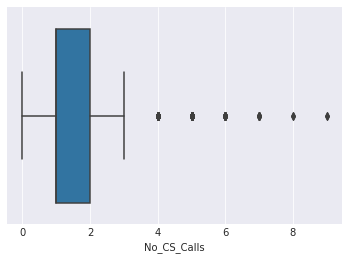

In [15]:
sns.boxplot(x=dsTrain.No_CS_Calls)

In [16]:
def remove_outlier(df_in, col_names):
    for col in col_names :
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_out

print("before removing outliers: ",dsTrain.shape)
dsTrain = remove_outlier(dsTrain,['State', 'Account_Length', 'Area_Code', 'Phone_No', 'No_Vmail_Messages',
       'Total_Day_Calls', 'Total_Day_charge', 'Total_Eve_Calls',
       'Total_Eve_Charge', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Calls', 'Total_Intl_Charge', 'No_CS_Calls'] )

print("after removing outliers: ", dsTrain.shape)

before removing outliers:  (3333, 21)
after removing outliers:  (3066, 21)


### Feature Engineering

/home/merabet/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


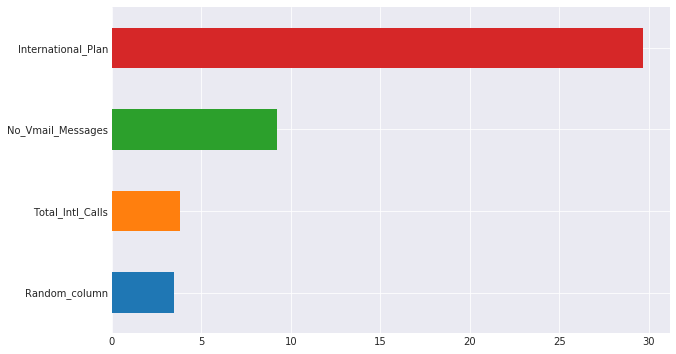

In [17]:
#add random column to dataset
dsTrain["Random_column"]= np.random.randint(0, 1000, size= len(dsTrain))
s = dsTrain.corrwith(dsTrain.Churn).sort_values()*100
s = s.loc[lambda df: ( df >= np.abs(df.Random_column)) &( df.index != 'Churn')]
s.plot(kind='barh', figsize=(10,6))


In [18]:
#delete correleted columns
deleted_columns = dsTrain.columns[[col.lower().endswith('_minutes') for col in dsTrain.columns]]
dsTrain.drop(deleted_columns, axis=1, inplace=True)

/home/merabet/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
feature_names = dsTrain.columns.drop(['Churn', 'Random_column', 'Phone_No'])
X = dsTrain.loc[:, feature_names]
y = dsTrain['Churn']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y,test_size= 0.30, random_state= 47)
feature_names

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'Voice_Mail_Plan', 'No_Vmail_Messages', 'Total_Day_Calls',
       'Total_Day_charge', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Calls',
       'Total_Intl_Charge', 'No_CS_Calls'],
      dtype='object')

In [20]:
## oversampling

print("Before OverSampling, counts of label '1': {}".format(sum(Ytrain==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(Ytrain==0)))

sm = SMOTE(random_state=42, ratio=1.0)
Xtrain, Ytrain = sm.fit_sample(Xtrain, Ytrain.ravel())
print('shape of Xtrain:{}'.format(Xtrain.shape))
print('shape of Ytrain:{}'.format(Ytrain.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Ytrain==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Ytrain==0)))

Before OverSampling, counts of label '1': 1886
Before OverSampling, counts of label '0': 260
shape of Xtrain:(3772, 15)
shape of Ytrain:(3772,)
After OverSampling, counts of label '1': 1886
After OverSampling, counts of label '0': 1886


In [21]:
#univariate feauture selection

selectorF = SelectKBest(f_classif, k=5)
#selectorF = SelectPercentile(f_classif, percentile=25)
selectorF.fit(Xtrain, Ytrain)
sel=pd.DataFrame(columns=['feature', 'F_score'])
for f,s in zip(X.columns, selectorF.scores_):
    print("F_score: %3.2f for feature %s"%(s,f))


F_score: 26.58 for feature State
F_score: 7.36 for feature Account_Length
F_score: 1.71 for feature Area_Code
F_score: 558.22 for feature International_Plan
F_score: 176.43 for feature Voice_Mail_Plan
F_score: 145.21 for feature No_Vmail_Messages
F_score: 1.87 for feature Total_Day_Calls
F_score: 1044.66 for feature Total_Day_charge
F_score: 12.48 for feature Total_Eve_Calls
F_score: 210.81 for feature Total_Eve_Charge
F_score: 3.90 for feature Total_Night_Calls
F_score: 32.08 for feature Total_Night_Charge
F_score: 30.12 for feature Total_Intl_Calls
F_score: 54.86 for feature Total_Intl_Charge
F_score: 5.27 for feature No_CS_Calls


In [22]:
# feature selection Using a greedy search
regressor = LogisticRegression(solver='newton-cg', max_iter=150)
selector_RFECV = RFECV(regressor, verbose=0, cv=10, scoring='average_precision')
selector_RFECV.fit(Xtrain, Ytrain)
selected_features = feature_names[selector_RFECV.support_]
print("The optimal number of features is : %d"%selector_RFECV.n_features_)
print("The selected features are :",selected_features.values)
print("----------------------------------------------------")
print("The excluded features are :",feature_names.difference(selected_features).values)

The optimal number of features is : 12
The selected features are : ['State' 'International_Plan' 'Voice_Mail_Plan' 'No_Vmail_Messages'
 'Total_Day_charge' 'Total_Eve_Calls' 'Total_Eve_Charge'
 'Total_Night_Calls' 'Total_Night_Charge' 'Total_Intl_Calls'
 'Total_Intl_Charge' 'No_CS_Calls']
----------------------------------------------------
The excluded features are : ['Account_Length' 'Area_Code' 'Total_Day_Calls']


### Predictive Modeling

In [23]:
Xtrain = pd.DataFrame(data=Xtrain, columns=feature_names)
Xtest = pd.DataFrame(data=Xtest, columns=feature_names)
Ytrain = pd.Series(data=Ytrain, name='Churn')
Ytest = pd.Series(data=Ytest, name='Churn')

selected_cols = selected_features
XtrainNew = Xtrain[selected_cols]
XtestNew = Xtest[selected_cols]
logreg = LogisticRegression(solver='newton-cg', max_iter=150)
logreg.fit(XtrainNew, Ytrain)
yPred = logreg.predict(XtestNew)
yPred_proba = logreg.predict_proba(XtestNew)
print("Coefficients: \n", logreg.coef_)
print("Means squared error %.2f \n" % np.mean((yPred-Ytest)**2))
print("Variance score %.2f" %logreg.score(XtestNew,Ytest))
print("F-score %.2f" % f1_score(Ytest, yPred))

Coefficients: 
 [[-0.00676374  3.2041957  -1.90572422 -0.02827563 -0.12516037 -0.01000767
  -0.15090559 -0.00592751 -0.13719552  0.09152662 -0.34596968  0.04550484]]
Means squared error 0.17 

Variance score 0.83
F-score 0.90


<function matplotlib.pyplot.legend(*args, **kwargs)>

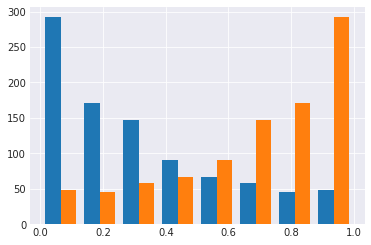

In [24]:
plt.hist(yPred_proba, bins=8)
plt.legend

In [25]:
yPred_optimized = binarize(yPred_proba, 0.7)[:,1]
print(confusion_matrix(Ytest, yPred_optimized))
yPred = yPred_optimized

[[ 80   5]
 [306 529]]


### Data Visualisation

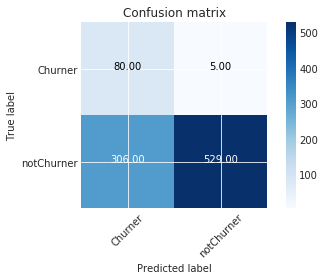

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Ytest, yPred)
np.set_printoptions(precision=2)
classes =['Churner', 'notChurner']

# plot confusion matrix
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cnf_matrix[i, j] > thresh else "black")

plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()                
plt.show()

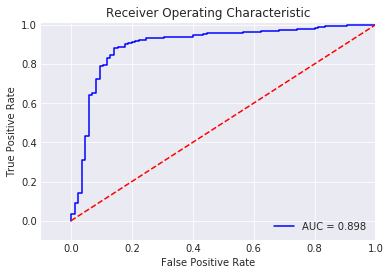

The value of roc_auc is : 0.8977


In [27]:
tmp = logreg.fit(XtrainNew, Ytrain.ravel())
y_pred_sample_score = tmp.decision_function(XtestNew)


fpr, tpr, thresholds = roc_curve(Ytest, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("The value of roc_auc is : %0.4f" %roc_auc)

(920, 15)
(920, 2)


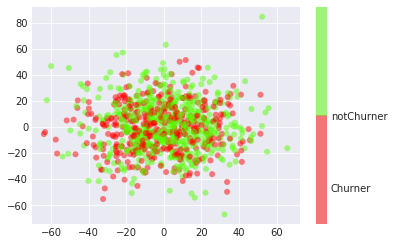

In [28]:
pca = PCA(n_components=2)
Xnew = pca.fit_transform(Xtest[selected_cols], y=yPred)
print(Xtest.shape)
print(Xnew.shape)

class_name =['Churner', 'notChurner']
plt.figure()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=yPred, edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('prism',2))

formatter = plt.FuncFormatter(lambda i, *args: class_name[int(i)])
plt.colorbar(ticks=[0, 1], format=formatter)
plt.clim(-0.5, 2.5)

In [29]:
def predict_churner(x, nb):
    x1 =x.loc[x.Phone_No==nb ,selected_features]
    y = logreg.predict(x1)
    print("The customer {} is {} ".format(nb, 'Churner' if( y==1) else 'notChurner'))

predict_churner(dsTest, 3548815)
predict_churner(dsTest, 4017159)

The customer 3548815 is Churner 
The customer 4017159 is notChurner 
